In [1]:
#pip install imbalanced-learn

In [29]:
from collections import Counter
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    plot_confusion_matrix
)


In [3]:
data =pd.read_csv("data/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
len(data)

5110

In [7]:
data.shape

(5110, 12)

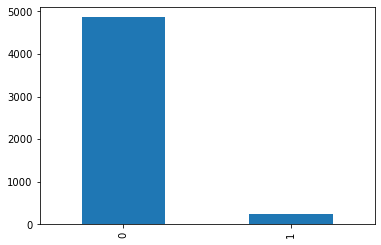

In [8]:
data["stroke"].value_counts().plot(kind="bar");

In [9]:
# Over Sampling the undersampled Data
# oversampler =RandomOverSampler(sampling_strategy="minority")

In [10]:
# Checking for missing data
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
data.fillna(27.0,inplace=True)

In [12]:
data["bmi"].isna().sum()

0

In [13]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Splitting Data into Features and Target
 * We will split data into `Feature(X)` and `target(y)`

In [14]:
y=data["stroke"]
X=data.drop("stroke",axis=1)

In [15]:
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.0,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [16]:
# # Define OverSampling Strategy
oversampler =RandomOverSampler(sampling_strategy="minority")
X_over,y_over =oversampler.fit_resample(X,y)
print(Counter(y_over))

#Make pipepline
model_lr =make_pipeline(OneHotEncoder(handle_unknown="ignore"),LogisticRegression(max_iter=1000))





Counter({1: 4861, 0: 4861})


In [17]:
# Split data into train_test_split
X_train_over,X_test_over,y_train_over,y_test_over=train_test_split(X_over,y_over,test_size=0.20,random_state=42)

In [18]:
#Make Pipeline
model_lr.fit(X_train_over,y_train_over)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [19]:
model_lr.score(X_train_over,y_train_over)

0.993956538510994

In [20]:
y_preds =model_lr.predict(X_test_over)
y_preds[:20]

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [21]:
y_test_over[:20]

1145    0
8501    1
3903    0
1608    0
9139    1
119     1
4602    0
1458    0
7609    1
2373    0
568     0
4480    0
1087    0
7726    1
6464    1
8585    1
9455    1
2685    0
321     0
1937    0
Name: stroke, dtype: int64

# Evaluation of our Model

In [22]:
accuracy_score(y_test_over,y_preds)

0.9722365038560411

In [23]:
confusion_matrix(y_test_over,y_preds)

array([[921,  54],
       [  0, 970]], dtype=int64)

C:\Users\ISAAC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


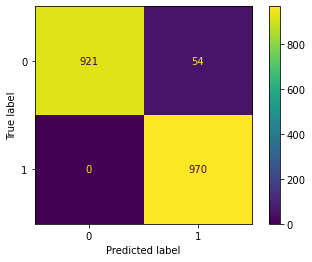

In [24]:

plot_confusion_matrix(model_lr, X_test_over, y_test_over)  
plt.show()


In [28]:
# Classification report